In [1]:
from toolbar.TN_WaveActivityFlux import TN_WAF_3D
from toolbar.curved_quivers.modplot import Curlyquiver
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

#以下为数据读取部分，最终所得z300，u300，v300为2014年11月的300hPa位势高度场，UV风场的月平均；
#z_tmp，u_tmp，v_tmp为1979-2018年11月的气候态；
#所有数据来自ECMWF的ERA-Interim数据集
era5 = xr.open_dataset("E:\data\ERA5\ERA5_pressLev\era5_pressLev.nc").sel(date=slice(19610101, 20221231), pressure_level=200)
era5 = xr.Dataset({
    'z': (['date', 'level', 'lat', 'lon'], era5['z'].data[:, np.newaxis, :, :]),
    'u': (['date', 'level', 'lat', 'lon'], era5['u'].data[:, np.newaxis, :, :]),
    'v': (['date', 'level', 'lat', 'lon'], era5['v'].data[:, np.newaxis, :, :]), },
    coords={'date': pd.to_datetime(era5['date'], format="%Y%m%d"),
            'level': [200],
            'lat': era5['latitude'].data,
            'lon': era5['longitude'].data})
era5 = era5.sel(date=era5['date.month'].isin([6, 7, 8]))
z_clim = era5['z'].mean(dim='date')
u_clim = era5['u'].mean(dim='date')
v_clim = era5['v'].mean(dim='date')
lon = era5['lon']
lat = era5['lat']

In [2]:
def plot_waf(location, z):
    sub_ax = fig.add_subplot(location, projection=ccrs.PlateCarree(central_longitude=180))
    waf_x, waf_y = TN_WAF_3D(z_clim, u_clim, v_clim, z - z_clim, filt=1, filtmode='mix')
    # 生成20个等高线
    level = np.linspace(-np.nanmax(np.abs((z - z_clim).sel(level=200))),
                        np.nanmax(np.abs((z - z_clim).sel(level=200))), 21)
    sub_ax.contour(lon, lat, (z - z_clim).sel(level=200), levels=level, transform=ccrs.PlateCarree(central_longitude=0), colors='white', linewidth=0.3)
    sub_ax.contourf(lon, lat, (z - z_clim).sel(level=200), levels=level, transform=ccrs.PlateCarree(central_longitude=0), cmap='coolwarm')
    WAF = Curlyquiver(sub_ax, lon, lat, waf_x, waf_y, regrid=30, lon_trunc=0, arrowsize=1.3, scale=100, linewidth=1.3,
                  color='black', transform=ccrs.PlateCarree(central_longitude=0), mode='loose')
    WAF.key(fig, U=.5, label='0.5 m$^2$/s$^2$', lr=1)
    sub_ax.coastlines()


IndexError: Unlabeled multi-dimensional array cannot be used for indexing: level

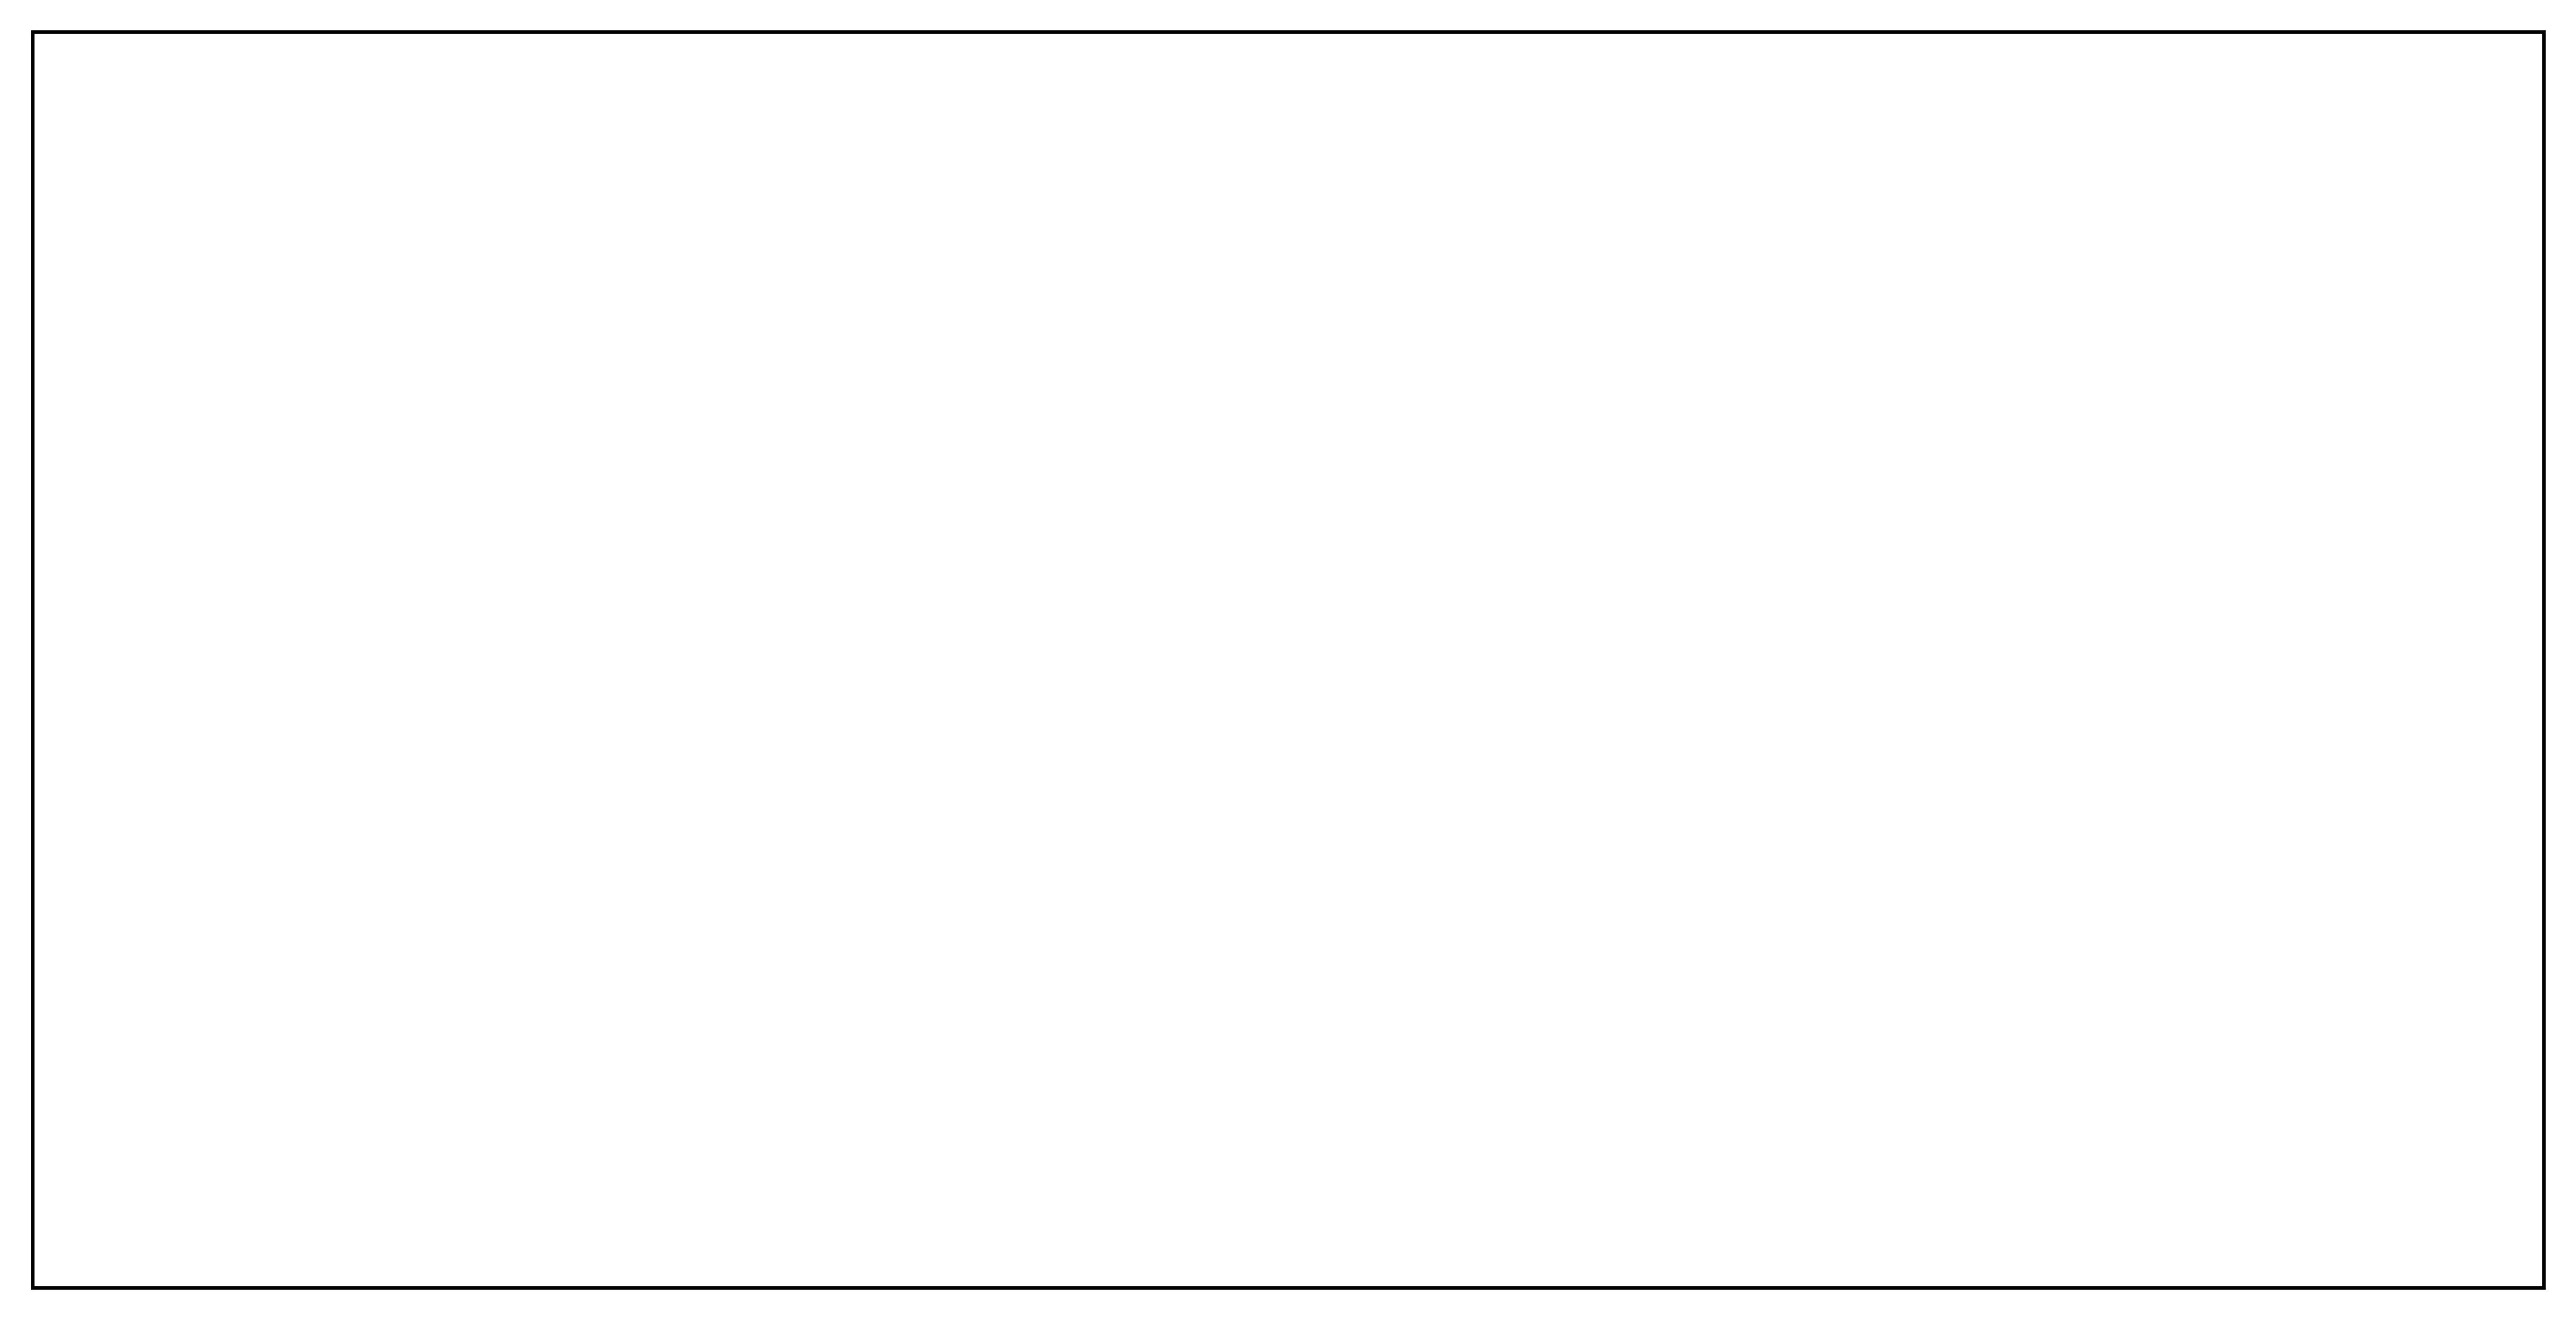

In [3]:
#以下为绘图部分
fig = plt.figure(figsize=(10, 10), dpi=600)
# 画出2000年夏季6-8月平均的WAF
z300 = era5['z'].sel(date=era5['date.year'].isin([2000])).mean(dim='date')
plot_waf(111, z300)
plt.show()